# Staż Techmo - zadania

Poniżej znajdują się 3 zadania, które należy rozwiązać poprzez napisanie odpowiedniego kodu (w komórkach pod treścią zadania w pliku **staz.ipynb**), pozwalającego na wykonanie wymaganych w zadaniu obliczeń i prezentacje wyników. Przy rozwiązywaniu zadań można korzystać z dowolnych paczek dostępnych w managerze Pip np. numpy, pandas, librosa itp.

Notebook z rozwiązaniem oraz dane wrzuć na swojego githuba razem z plikiem *requirements.txt* pozwalającym na łatwą instalacje wszystkich wymaganych paczek.

## 1. Przetwarzanie sygnałów

* Wczytaj plik dźwiękowy *audio.wav*
* Wstaw widget z audioplayerem tak, aby można było odsłuchać plik
* Narysuj **oscylogram**
* Wyznacz i narysuj przebieg tonu podstawowego **F0**
* Wyznacz i narysuj w skali decybelowej krótkoczasowe widmo sygnału (**STFT**). Dobierz odpowiednie wg Ciebie parametry analizy. Uzasadnij swój wybór.
* Wyznacz i narysuj w skali decybelowej wartości **MFCC** (13 współczynników). Parametry analizy pozostaw takie jak w kroku poprzednim.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from IPython.display import Audio
#import pitch
from scipy import signal


#wczytanie pliku i wstawienie widgetu

Fs,data = read('audio.wav')

Audio(data,rate=Fs)

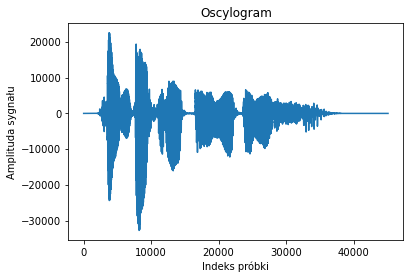

In [96]:
#narysowanie oscylogramu
plt.plot(data)
plt.xlabel('Indeks próbki')
plt.ylabel('Amplituda sygnału')
plt.title('Oscylogram')
plt.show()

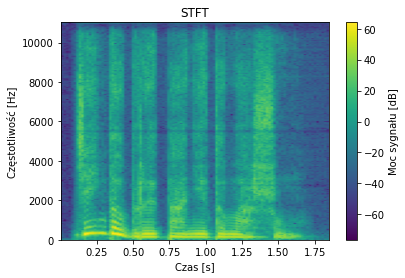

In [97]:
#STFT

f, t, Zxx = signal.stft(data, Fs)
#Zxx - STFT sygnału

#rysuję spektrogram
plt.specgram(data[1:41000], Fs=Fs, scale='dB', NFFT=512, noverlap=128)

# w celu zminimalizowania krawędzi przejścia przebiegu i zmniejszenia rozmycia widma użyte zostało okno hanninga 
# (domyślne dla specgram),
# szerokość okna analizy została ustawiona na 512 próbek - STFT jest pewnego rodzaju kompromisem - im lepsza
# rozdzielczość w czasie tym gorsza w dziedzinie częstotliwości, szersze okno oznacza lepszą rozdzielczość
# częstotliwościową, a węższe w dziedzinie czasu - szerokość ustawiona na 512 zapewnia rozdzielczości umożliwiające
# wygodny odczyt zarówno w dziedzinie czasu jak i częstotliwości
# wartość noverlap została pozostawiona domyślna

plt.title('STFT')
plt.ylabel('Częstotliwość [Hz]')
plt.xlabel('Czas [s]')
plt.colorbar().set_label('Moc sygnału [dB]', rotation=90)
plt.show()

In [98]:
#MFCC

import librosa
import librosa.display

signal, fs = librosa.load('audio.wav')

mfccs = librosa.feature.mfcc(y=signal, sr=fs, hop_length=128, n_mfcc=13, n_fft=512)

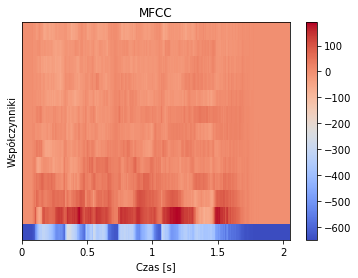

In [99]:
librosa.display.specshow(mfccs, x_axis='time', sr=fs, hop_length=128)
plt.colorbar()
plt.title('MFCC')
plt.ylabel('Współczynniki')
plt.xlabel('Czas [s]')
plt.show()

## 2. Metryki

W pliku *predicted.json* zapisane są wyniki rozpoznania systemu ASR, służącego do rozpoznawania cyfr.

Dla każdej cyfry od 0 do 9 w słowniku przedstawione są wartości, jakie system rozpoznał dla kolejnych nagrań danej cyfry. 

Oblicz i przedstaw w formie tabeli **macierz pomyłek** (confusion matrix) oraz oblicz **skuteczność** systemu.

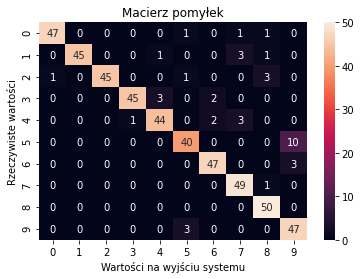

Skutecznosc systemu: 91.8%


In [100]:
import itertools

data = []
liczba=0
a=0
file = open("predicted.json", "r")

#przygotowanie danych z pliku i dodanie liczb do wektora
for i in range(10):
    
    for line in itertools.islice(file, 2+a*52, (a+1)*52):
        line = line.replace('"', '').strip()
        line = line.strip(',')
        line = int(line,10)
        data.append(line)


file.close()
conf = np.zeros( (10, 10) )
suma_poprawnych=0
suma_wszystkich=0

#zliczanie wyników dla danych cyfr
for x in range(0,10):
    for i in range(x*50,(x+1)*50):
        
        if data[i] == 0:
            conf[x][0] = conf[x][0]+1
        elif data[i] == 1:
            conf[x][1] = conf[x][1]+1
        elif data[i] == 2:
            conf[x][2] = conf[x][2]+1
        elif data[i] == 3:
            conf[x][3] = conf[x][3]+1
        elif data[i] == 4:
            conf[x][4] = conf[x][4]+1
        elif data[i] == 5:
            conf[x][5] = conf[x][5]+1
        elif data[i] == 6:
            conf[x][6] = conf[x][6]+1
        elif data[i] == 7:
            conf[x][7] = conf[x][7]+1
        elif data[i] == 8:
            conf[x][8] = conf[x][8]+1
        elif data[i] == 9:
            conf[x][9] = conf[x][9]+1
    
    #zliczenie poprawnie odczytanych wyników
    suma_poprawnych = np.matrix.trace(conf)
    #zliczenie wszystkich wyników
    suma_wszystkich = suma_wszystkich+conf[x][0]+conf[x][1]+conf[x][2]+conf[x][3]+conf[x][4]+conf[x][5]+conf[x][6]+conf[x][7]+conf[x][8]+conf[x][9]
    
#macierz pomyłek
sn.heatmap(conf, annot=True, fmt='g')
plt.ylabel('Rzeczywiste wartości')
plt.xlabel('Wartości na wyjściu systemu') 
plt.title('Macierz pomyłek')
plt.show()

skutecznosc = suma_poprawnych/suma_wszystkich*100
print('Skutecznosc systemu: '+ str(skutecznosc) +'%')


## 3. Algebra

W plikach tekstowych `matrix_P.txt` oraz `matrix_Q.txt` znajduje się po 8 pomiarów 4-wymiarowej zmiennej (8 wierszy po 4 wartości).
* Wczytaj macierze do osobnych zmiennych `P` , `Q`.
* Korzystając z biblioteki `numpy` zaimplementuj funkcję obliczającą wzór:

$$
D_{KL}(P, Q) = \frac{1}{2} \mathrm{tr}\{(\boldsymbol{\Sigma}_p^{-1} + \boldsymbol{\Sigma}_q^{-1})(\boldsymbol{\mu}_p - \boldsymbol{\mu}_q)(\boldsymbol{\mu}_p - \boldsymbol{\mu}_q)^T + \boldsymbol{\Sigma}_p \boldsymbol{\Sigma}_q^{-1} + \boldsymbol{\Sigma}_q \boldsymbol{\Sigma}_p^{-1} - 2 \boldsymbol{I}\}
$$

gdzie:

$\mathrm{tr}$ – ślad macierzy (trace)

$\boldsymbol{\Sigma}$ – macierz kowariancji

$\boldsymbol{\mu}$ – uśredniony wektor ze wszystkich pomiarów

$\boldsymbol{I}$ – macierz jednostkowa

> Dla podanych danych funkcja powinna zwrócić wartość ok. 6.03

In [101]:
def my_function(P,Q):


    covP = np.cov(P,rowvar=False)
    covQ = np.cov(Q,rowvar=False)

    mP = np.mean(P,axis=0)
    mQ = np.mean(Q,axis=0)
    

    invCovP = np.linalg.inv(covP)
    invCovQ = np.linalg.inv(covQ)

    size = (covP*invCovQ).shape
    I = np.eye(size[0],size[1])
    D = 1/2*np.matrix.trace((invCovP+invCovQ)*(mP-mQ)*((mP-mQ).transpose())+covP*invCovQ+covQ*invCovP-2*I)
    
    return D

In [102]:
P = np.loadtxt("matrix_P.txt", dtype='i', delimiter=' ')
Q = np.loadtxt("matrix_Q.txt", dtype='i', delimiter=' ')

wynik = my_function(P,Q)
print('Wynik = ' + str(wynik))

Wynik = 6.0214704400066195
